In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential,layers
%matplotlib inline

In [2]:
data = pd.read_csv("../input/titanic/train.csv")
data['Pclass'].value_counts()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def tic_process(x):
    dic={'1':0,'2':0.05,'3':0.1,'4':0.15,'5':0.2,'6':0.25,'7':0.3,'8':0.35,'9':0.4,'P':0.45,'S':0.5,'C':0.55,'A':0.6,'W':0.65,'F':0.7,'L':0.75}
    #dic={'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'P':10,'S':11,'C':12,'A':13,'W':14,'F':15,'L':16}
    x=x[0]
    return x

In [4]:
def cabin_map(cb):
    if len(cb)>0:
        return cb[0]
def prepro(dt):
    scaler=MinMaxScaler()
#     dt['Pclass'].replace({1:0,2:0.5,3:1},inplace=True)
#     dt['Sex'].replace({'male':0,'female':1},inplace=True)
#     dt['Embarked'].replace({'S':0,'C':0.5,'Q':1},inplace=True)
    dt['Cabin']=dt['Cabin'].astype(str)
    dt['Cabin']=dt['Cabin'].apply(cabin_map)
    dt['Cabin']=dt['Cabin'].factorize()[0]
    dt['Pclass']=dt['Pclass'].factorize()[0]
    dt['Sex']=dt['Sex'].factorize()[0]
    dt['Embarked']=dt['Embarked'].factorize()[0]
    dt['Age']=scaler.fit_transform(dt['Age'].to_numpy().reshape(-1,1))
    dt['Fare']=scaler.fit_transform(dt['Fare'].to_numpy().reshape(-1,1))
#     dt['Cabin'].replace({'A':0,'B':0.1,'C':0.2,'D':0.3,'E':0.4,'F':0.5,'G':0.6,'T':0.7,'n':0.8},inplace=True)
    dt['Ticket']=dt['Ticket'].apply(tic_process)
    dt['Ticket']=dt['Ticket'].factorize()[0]
    return dt

In [5]:
data=prepro(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",0,0.271174,1,0,0,0.014151,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.472229,1,0,1,0.139136,1,1
2,3,1,0,"Heikkinen, Miss. Laina",1,0.321438,0,0,2,0.015469,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.434531,1,0,3,0.103644,1,0
4,5,0,0,"Allen, Mr. William Henry",0,0.434531,0,0,4,0.015713,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [7]:
midage=data['Age'].median()
midFare=data['Fare'].median()
data['Age'].fillna(data['Age'].median(),inplace=True)
# # print(data['Embarked'].mode())
# data['Embarked'].fillna(data['Embarked'].median(),inplace=True)
# # data['Embarked']=data['Embarked'].astype('int8')
# #data['Embarked'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [8]:
data.drop(columns=['PassengerId','Name'],inplace=True)
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0.271174,1,0,0,0.014151,0,0
1,1,1,1,0.472229,1,0,1,0.139136,1,1
2,1,0,1,0.321438,0,0,2,0.015469,0,0
3,1,1,1,0.434531,1,0,3,0.103644,1,0
4,0,0,0,0.434531,0,0,4,0.015713,0,0


In [11]:
x=data[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
# fare=x['Fare'].to_numpy().reshape(-1,1)
# age=x['Age'].to_numpy().reshape(-1,1)
# scaler=MinMaxScaler()
# fare=scaler.fit_transform(fare)
# age=scaler.fit_transform(age)
# x.iloc[:,7]=fare
# x.iloc[:,3]=age
# x.describe()
x=x.iloc[:,:].to_numpy()
y=data.iloc[:,0].to_numpy()
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
print(xtrain.shape,ytrain.shape)

(668, 9) (668,)


In [27]:
from sklearn.svm import SVC
svm=SVC(gamma='auto',probability=True)
svm.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score as acc
yp=svm.predict(xtest)
a=acc(yp,ytest)
print(a)

0.8026905829596412


In [40]:
def dl():
    model=Sequential()
    #model.add(layers.BatchNormalization(input_shape=(8,)))
    model.add(layers.Dense(256,input_shape=(9,),activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
#     model.add(layers.Dense(256,activation='tanh'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.25))
    model.add(layers.Dense(512,activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
#     model.add(layers.Dense(32,activation='tanh'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.25))
    model.add(layers.Dense(128,activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',  
              metrics=['accuracy'])
    
    return model

In [41]:
model=dl()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2560      
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [30]:
callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=0.01,patience=50,restore_best_weights=True)
history=model.fit(x,y,batch_size=16,callbacks=[callback],epochs=1000,validation_split=0.25)

Epoch 1/1000
56/56 [==============================] - 2s 9ms/step - loss: 0.8735 - accuracy: 0.6474 - val_loss: 0.6505 - val_accuracy: 0.6054
Epoch 2/1000
56/56 [==============================] - 0s 6ms/step - loss: 0.5640 - accuracy: 0.7618 - val_loss: 0.5162 - val_accuracy: 0.7578
Epoch 3/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.5628 - accuracy: 0.7541 - val_loss: 0.4908 - val_accuracy: 0.7803
Epoch 4/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.5372 - accuracy: 0.7769 - val_loss: 0.4523 - val_accuracy: 0.8072
Epoch 5/1000
56/56 [==============================] - 0s 6ms/step - loss: 0.5842 - accuracy: 0.7341 - val_loss: 0.4969 - val_accuracy: 0.7892
Epoch 6/1000
56/56 [==============================] - 0s 6ms/step - loss: 0.4999 - accuracy: 0.7926 - val_loss: 0.4430 - val_accuracy: 0.8072
Epoch 7/1000
56/56 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.7797 - val_loss: 0.4283 - val_accuracy: 0.8206
Epoch 

56/56 [==============================] - 0s 5ms/step - loss: 0.4177 - accuracy: 0.8342 - val_loss: 0.3411 - val_accuracy: 0.8744
Epoch 59/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.8281 - val_loss: 0.3553 - val_accuracy: 0.8565
Epoch 60/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.3727 - accuracy: 0.8414 - val_loss: 0.3412 - val_accuracy: 0.8610
Epoch 61/1000
56/56 [==============================] - 0s 6ms/step - loss: 0.4035 - accuracy: 0.8347 - val_loss: 0.3542 - val_accuracy: 0.8520
Epoch 62/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.3952 - accuracy: 0.8259 - val_loss: 0.3441 - val_accuracy: 0.8700
Epoch 63/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.4084 - accuracy: 0.8389 - val_loss: 0.3601 - val_accuracy: 0.8565
Epoch 64/1000
56/56 [==============================] - 0s 5ms/step - loss: 0.3799 - accuracy: 0.8587 - val_loss: 0.3556 - val_accuracy: 0.8610
Epoch 65/1000

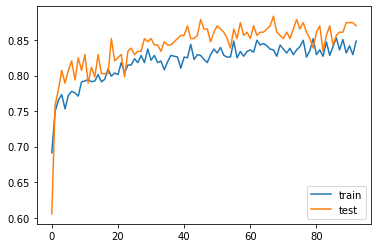

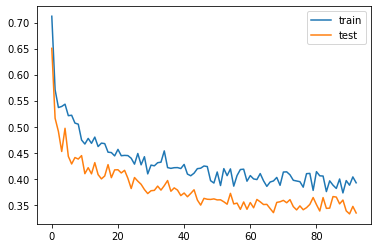

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'],loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'],loc='upper right')
plt.show()


In [32]:
test=pd.read_csv('../input/titanic/test.csv')
test=prepro(test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,"Kelly, Mr. James",0,0.452723,0,0,0,0.015282,0,0
1,893,0,"Wilkes, Mrs. James (Ellen Needs)",1,0.617566,1,0,0,0.013663,0,1
2,894,1,"Myles, Mr. Thomas Francis",0,0.815377,0,0,1,0.018909,0,0
3,895,0,"Wirz, Mr. Albert",0,0.353818,0,0,0,0.016908,0,1
4,896,0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.287881,1,1,0,0.023984,0,1


In [33]:
pid=test['PassengerId'].to_numpy()
print(pid)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [34]:
#test.drop(columns=['PassengerId','Name'],inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 36.0+ KB


In [35]:
test['Age'].fillna(midage,inplace=True)
test['Fare'].fillna(midFare,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 36.0+ KB


In [36]:
x_t=test[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
# fare=x_t['Fare'].to_numpy().reshape(-1,1)
# scaler=MinMaxScaler()
# fare=scaler.fit_transform(fare)
# age=x_t['Age'].to_numpy().reshape(-1,1)
# age=scaler.fit_transform(age)
# x_t.iloc[:,6]=fare
# x_t.iloc[:,2]=age
# x_t['Fare'].fillna(0.5,inplace=True)


In [37]:
print(x_t.head())
x_t=x_t.iloc[:,:].to_numpy()

   Pclass  Sex       Age  SibSp  Parch  Ticket      Fare  Cabin  Embarked
0       0    0  0.452723      0      0       0  0.015282      0         0
1       0    1  0.617566      1      0       0  0.013663      0         1
2       1    0  0.815377      0      0       1  0.018909      0         0
3       0    0  0.353818      0      0       0  0.016908      0         1
4       0    1  0.287881      1      1       0  0.023984      0         1


In [38]:
y_t=model.predict(x_t)
y_t=[1 if i>=0.5 else 0 for i in y_t]
result=pd.DataFrame({'PassengerId':pid,'Survived':y_t})
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [39]:
result.to_csv('submission.csv',index=False)